2019 Jun 19<br>
Based on some conversations at the KITP summer workshop, I'm exploring how robust our variability detection is against stellar variability.

In [3]:
%matplotlib inline
import numpy as np
import matplotlib.pyplot as plt

# Official Boise State colors - https://brandstandards.boisestate.edu/colors/
BoiseState_blue = '#0033A0'
BoiseState_orange = '#D64309'

aspect_ratio = 16./9

# 2018 Dec 21 
# dill.load_session("Analysis_of_Kepler76b_2018Dec7.db")

# cached = ipycache.load_vars('Analysis_of_Kepler76b_2018Dec14.pkl', ['new_BEER_out'])
# new_BEER_out = cached['new_BEER_out']

from numpy.random import normal, random
from scipy.odr import *

(0.38007933024056895, 0.5923842883841051)
Beta: [0.42421127 0.55074197]
Beta Std Error: [0.06772403 0.03916221]
Beta Covariance: [[ 0.00448429 -0.00221989]
 [-0.00221989  0.00149949]]
Residual Variance: 1.02280238563
Inverse Condition #: 0.230656118834
Reason(s) for Halting:
  Sum of squares convergence


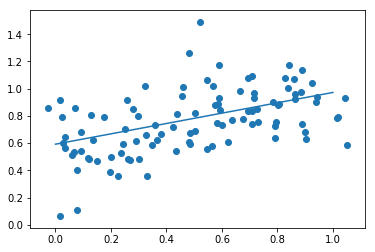

In [36]:
# 2019 Jun 19 - Let's first check whether you can produce a positive slope for uncorrelated variables.

# Define a function to fit the data with.
def lin_func(p, x):
    m, c = p
    return m*x + c

# Create a model for fitting.
lin_model = Model(lin_func)

slope, intercept = random(2)
noise_x, noise_y = 0.25*random(2)

num_points = 100

x = np.linspace(0, 1, num_points)
y = np.polyval([slope, intercept], x)

noisy_x = x + noise_x*normal(size=len(x))
noisy_y = y + noise_y*normal(size=len(y))

plt.scatter(noisy_x, noisy_y)
plt.plot(x, y)

# Create a RealData object using our initiated data from above.
data = RealData(noisy_x, noisy_y, sx=noise_x, sy=noise_y)

# Set up ODR with the model and data.
odr = ODR(data, lin_model, beta0=[0., 0.])

# Run the regression.
out = odr.run()

# Use the in-built pprint method to give us results.
print(slope, intercept)
out.pprint()

(0.02046983457301403, 0.020172659410343463)
(0.16252313234156504, 0.1573999831985831)
0.34340699648540335


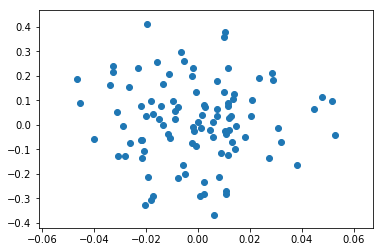

In [123]:
# 2019 Jun 19 - Let's first check whether you can produce a positive slope for uncorrelated variables.

# Define a function to fit the data with.
def lin_func(p, x):
    m, c = p
    return m*x + c

# Create a model for fitting.
lin_model = Model(lin_func)

slope, intercept = random(2)
noise_x, noise_y = 0.25*random(2)

num_points = 100

noisy_x = noise_x*normal(size=len(x))
noisy_y = noise_y*normal(size=len(y))

plt.scatter(noisy_x, noisy_y)

# Create a RealData object using our initiated data from above.
data = RealData(noisy_x, noisy_y, sx=np.sqrt(noise_x), sy=np.sqrt(noise_y))

# Set up ODR with the model and data.
odr = ODR(data, lin_model, beta0=[0., 0.])

# Run the regression.
out = odr.run()

# Use the in-built pprint method to give us results.
# out.pprint()
print(np.abs(out.beta[0])/out.sd_beta[0])